### **Practical session I**


### The distribution of SP lengths (R)

In [ ]:
%load_ext rpy2.ipython
%%R
library ("stringr")
library(ggplot2)

benchmark_set <- read.delim("C:/Users/itana/Desktop/Plot/benchmark_set.tsv")
training_set <- read.delim("C:/Users/itana/Desktop/Plot/training_set.tsv")

ch='S'
count_bench <- str_count(benchmark_set$SP.cleavage.site.annotation, ch)
count_train <- str_count(training_set$SP.cleavage.site.annotation, ch)

hist( count_bench[!count_bench==0], col="lightsteelblue1", main="SP length distribuition (Benchmark_set)",
           xlab="SP length", breaks='FD', xlim=c(10,50), ylim=c(0,45) )

hist( count_train[!count_train==0], col="plum3", main="SP length distribuition (Train_set)",
             xlab="SP length", breaks='FD', xlim=c(10,50), ylim=c(0,55) )





SyntaxError: ignored

### 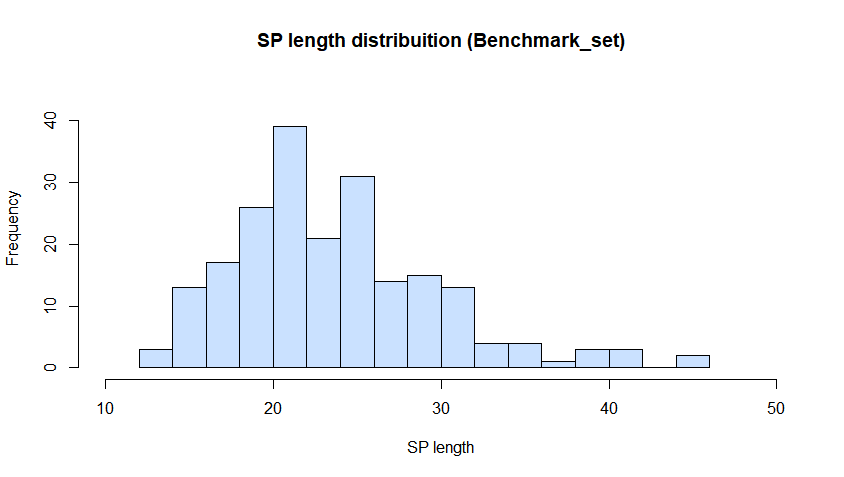

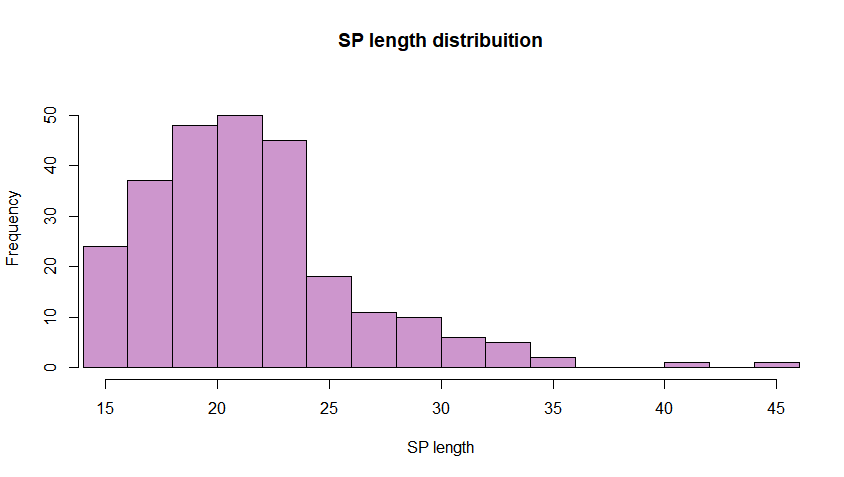

### Comparative amino-acid composition of SPs (TRAIN)

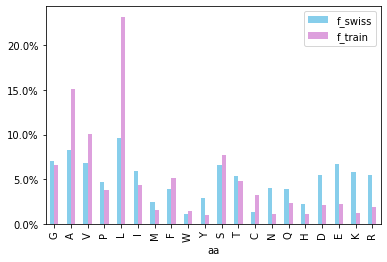

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
prctg=[7.07,8.25,6.86,4.74,9.65,5.91,2.41,3.86,1.10,2.92,6.64,5.35,1.38,4.06,3.93,2.27,5.46,6.72,5.80,5.53]
d = {'aa':aa,'prctg':prctg}
swiss = pd.DataFrame(d, columns=['aa','prctg'])


train = pd.read_csv('/content/training_set.tsv', sep='\t')

train.rename(columns={ train.columns[5]: "Sequence" }, inplace = True)
train.rename(columns={ train.columns[6]: "SN" }, inplace = True)
seqs= train['Sequence'].tolist()
sig=train['SN'].tolist()

l_sig=[]

for si in sig:
  n=si.count('S')
  l_sig.append(n)

sliced_seq=[]

for s,n in zip(seqs,l_sig):
  if n!=0:
    slic=s[:n+2]
    sliced_seq.append(slic)


cleavage_site=[]

for i in sliced_seq:
  sliced=i[-15:]
  cleavage_site.append(sliced)


seq=''.join(cleavage_site)

def char_frequency_train(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1

        else:
            dict[n] = 1


    return dict

t=char_frequency_train(seq)

for key in t.keys():
    t[key]=float(round((t[key]/len(seq)*100), 2))



df_train=pd.DataFrame(list(t.items()),columns = ['aa','prctg'])


df1 = pd.merge(swiss, df_train, on='aa', sort=False)             #final Data Frame
df1.columns=['aa','f_swiss','f_train']

ax=df1.set_index('aa').plot.bar(color=['skyblue','plum'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


### Comparative amino-acid composition of SPs (BENCH)

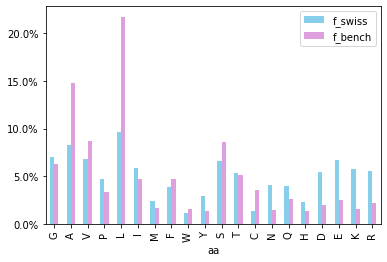

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

aa=['G','A','V','P','L','I','M','F','W','Y','S','T','C','N','Q','H','D','E','K','R']
prctg=[7.07,8.25,6.86,4.74,9.65,5.91,2.41,3.86,1.10,2.92,6.64,5.35,1.38,4.06,3.93,2.27,5.46,6.72,5.80,5.53]
d = {'aa':aa,'prctg':prctg}
swiss = pd.DataFrame(d, columns=['aa','prctg'])


bench = pd.read_csv('/content/benchmark_set.tsv', sep='\t')


bench.rename(columns={ bench.columns[4]: "Sequence" }, inplace = True)
bench.rename(columns={ bench.columns[5]: "SN" }, inplace = True)

seqs= bench['Sequence'].tolist()
sig=bench['SN'].tolist()

l_sig=[]

for si in sig:
  n=si.count('S')
  l_sig.append(n)

sliced_seq=[]

for s,n in zip(seqs,l_sig):
  if n!=0:
    slic=s[:n+2]
    sliced_seq.append(slic)


cleavage_site=[]

for i in sliced_seq:
  sliced=i[-15:]
  cleavage_site.append(sliced)

seq=''.join(cleavage_site)

def char_frequency_bench(str1):
    dict = {}
    for n in str1:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1

        else:
            dict[n] = 1


    return dict

b=char_frequency_bench(seq)

for key in b.keys():
    b[key]=float(round((b[key]/len(seq)*100), 2))



df_bench=pd.DataFrame(list(b.items()),columns = ['aa','prctg'])
df_bench

df2 = pd.merge(swiss, df_bench, on='aa', sort=False)             #final Data Frame
df2.columns=['aa','f_swiss','f_bench']

ax=df2.set_index('aa').plot.bar(color=['skyblue','plum'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

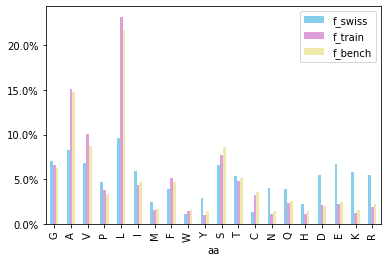

In [ ]:
merged_df = pd.merge(df1, df2, on=['aa','f_swiss'], how='inner')
ax=merged_df.set_index('aa').plot.bar(color=['skyblue','plum','PaleGoldenRod'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

### Taxonomic classification (TRAIN)

In [ ]:
import numpy as np
train['Counts'] = np.zeros(len(train))
grp_df = train.groupby('Kingdom').count()
grp_df= grp_df.sort_values(by='Counts',ascending=False)

grp_df = grp_df.drop(grp_df.columns[[1, 2,3,4,5,6]], axis=1)
grp_df.columns=['counts']

df1 = grp_df.iloc[:5]
df2 = grp_df.iloc[5:]
other_n=df2['counts'].sum()
df1 = df1.reset_index(level=0)
data={'counts':[other_n]}    #'Kingdom':['Others'],
other=pd.DataFrame(data)
other

df_merged = df1.append(other, ignore_index=True)
#df_merged
df=df_merged.groupby(['Kingdom']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%',colors=['skyblue','plum','mediumspringgreen','bisque','lightcoral','pink'])
df.plot(figsize=(10,10))



### Taxonomic classification (BENCH)

In [ ]:
import numpy as np

bench = pd.read_csv('/content/benchmark_set.tsv', sep='\t')
bench['Counts'] = np.zeros(len(bench))

grp_df = bench.groupby('Taxa').count()
grp_df= grp_df.sort_values(by='Counts',ascending=False)

grp_df = grp_df.drop(grp_df.columns[[1, 2,3,4,5]], axis=1)
grp_df.columns=['counts']

df1 = grp_df.iloc[:5]
df2 = grp_df.iloc[5:]
other_n=df2['counts'].sum()
df1 = df1.reset_index(level=0)
data={'Taxa':['Others'],'counts':[other_n]}
other=pd.DataFrame(data)
other

df_merged = df1.append(other, ignore_index=True)
#df_merged
df=df_merged.groupby(['Taxa']).sum().plot(kind='pie', y='counts', autopct='%1.0f%%',colors=['skyblue','plum','mediumspringgreen','bisque','lightcoral','pink'])
df.plot(figsize=(5,5))



### Sequence logos of SP cleavage sites (TRAIN)

In [ ]:
train.rename(columns={ train.columns[5]: "Sequence" }, inplace = True)
train.rename(columns={ train.columns[6]: "SN" }, inplace = True)
seqs= train['Sequence'].tolist()
sig=train['SN'].tolist()

l_sig=[]

for si in sig:
  n=si.count('S')
  l_sig.append(n)

sliced_seq=[]

for s,n in zip(seqs,l_sig):
  if n!=0:
    slic=s[:n+2]
    sliced_seq.append(slic)


cleavage_site=[]

for i in sliced_seq:
  sliced=i[-15:]
  cleavage_site.append(sliced)




with open('/content/sequences.txt', 'w') as fp:
    for item in cleavage_site:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')


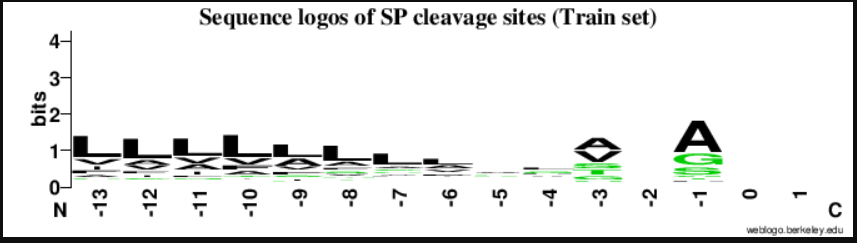

### Sequence logos of SP cleavage sites (BENCH)

In [ ]:
bench = pd.read_csv('/content/benchmark_set.tsv', sep='\t')
bench.rename(columns={ bench.columns[4]: "Sequence" }, inplace = True)
bench.rename(columns={ bench.columns[5]: "SN" }, inplace = True)

seqs= bench['Sequence'].tolist()
sig=bench['SN'].tolist()

l_sig=[]

for si in sig:
  n=si.count('S')
  l_sig.append(n)

sliced_seq=[]

for s,n in zip(seqs,l_sig):
  if n!=0:
    slic=s[:n+2]
    sliced_seq.append(slic)


cleavage_site=[]

for i in sliced_seq:
  sliced=i[-15:]
  cleavage_site.append(sliced)




with open('/content/sequences_bench.txt', 'w') as fp:
    for item in cleavage_site:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

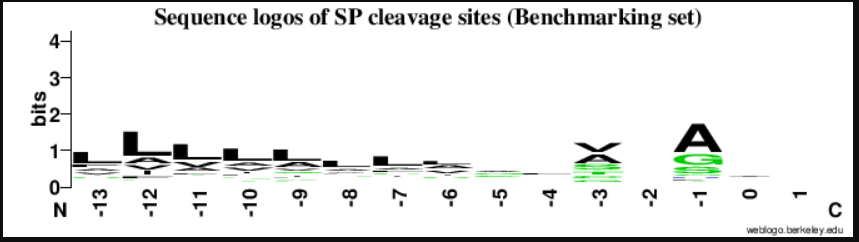

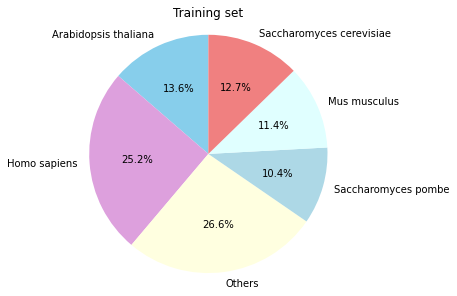

In [ ]:
import matplotlib.pyplot as plt

labels = ['Arabidopsis thaliana', 'Homo sapiens', 'Others', 'Saccharomyces pombe','Mus musculus','Saccharomyces cerevisiae']
sizes = [13.64, 25.19, 26.58, 10.45,11.43,12.71 ]
colors = ["#87CEEB", "#DDA0DD", "#FFFFE0", "#ADD8E6", "#E0FFFF", "#F08080"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()
plt.set_title("Training set")